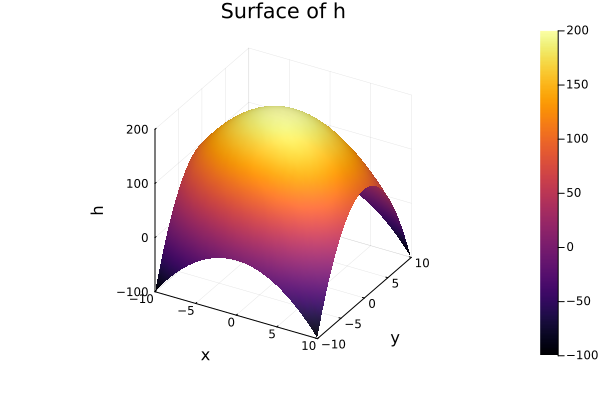

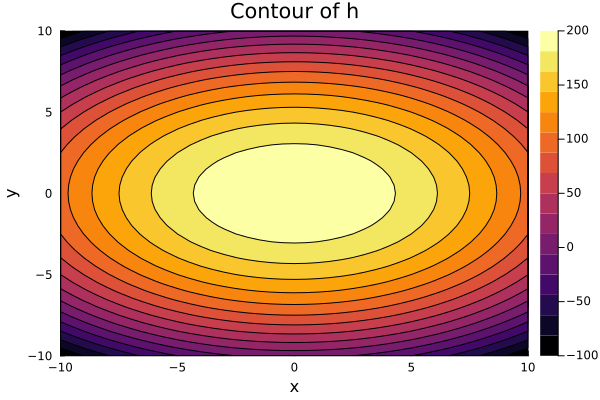

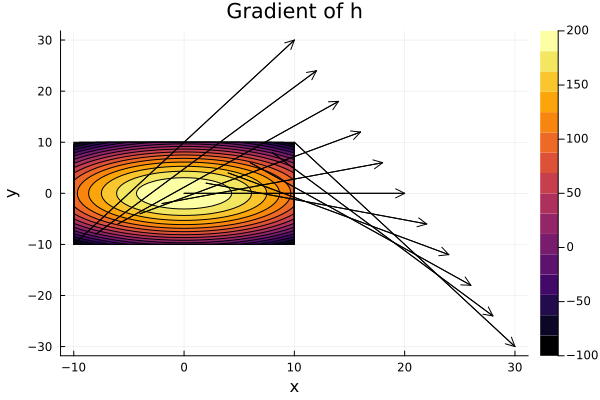

In [15]:
# 1Q
using Plots
gr()

# --- Scalar field and derivatives ---
h(x,y) = 200 - x^2 - 2y^2
hx(x,y) = -2x
hy(x,y) = -4y

# --- Fine grid ---
xs = -10:0.5:10
ys = -10:0.5:10

# --- 1) 3D surface plot ---
p1 = surface(xs, ys, (x,y)->h(x,y),
    title="Surface of h", xlabel="x", ylabel="y", zlabel="h")
display(p1)

# --- 2) 2D contour plot ---
Z = [h(x,y) for y in ys, x in xs]
p2 = contour(xs, ys, Z, fill=true,
    title="Contour of h", xlabel="x", ylabel="y")
display(p2)

# --- 3) Gradient field (arrows) ---
xg = -10:2:10
yg = -10:2:10
U = [hx(x,y) for y in yg, x in xg]
V = [hy(x,y) for y in yg, x in xg]

p3 = contour(xs, ys, Z, fill=true,
    title="Gradient of h", xlabel="x", ylabel="y")
quiver!(p3, xg, yg, quiver=(U,V), color=:black)
display(p3)


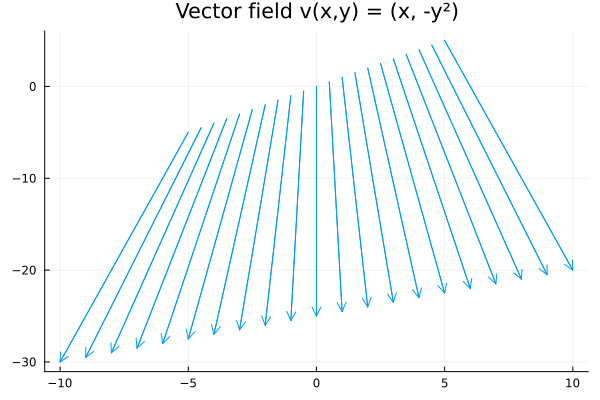

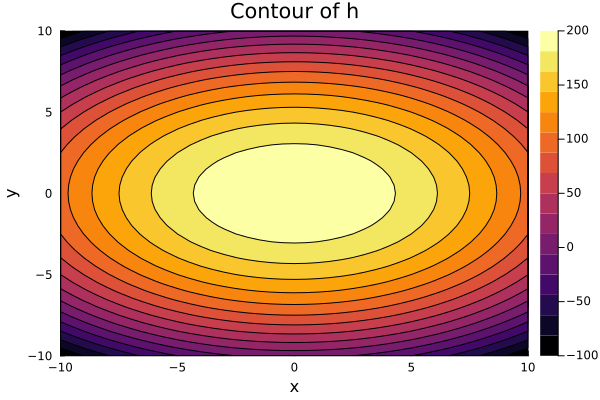

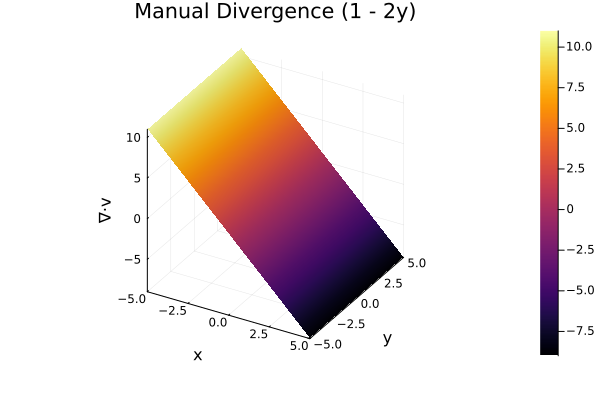

In [9]:
#Question 2
# 2(a)- vector field
using CalculusWithJulia
using Plots
gr()

v(x,y) = [x, -y^2]

x = -5:0.5:5
y = -5:0.5:5

vx = [v(xi,yi)[1] for xi in x, yi in y]
vy = [v(xi,yi)[2] for xi in x, yi in y]   

p1 = quiver(x, y, quiver = (vx, vy), title = "Vector field v(x,y) = (x, -y²)")
display(p1)

# 2(b) Automatic Divergence vs Detailed calculation
using CalculusWithJulia
using Plots
gr()

v_vec(v) = [v[1], -v[2]^2]

#Automatic divergence calculation
div_auto(v) = CalculusWithJulia.divergence(v_vec,v)

div_auto_vals = [div_auto([xi, yi]) for xi in x, yi in y]

div_manual(x, y) = 1 - 2y
div_manual_vals = [div_manual(xi, yi) for xi in x, yi in y]

p1 = surface(x, y, div_auto_vals,
    title="Automatic Divergence",
    xlabel="x", ylabel="y", zlabel="∇⋅v"
)
display(p2)

p3 = surface(x, y, div_manual_vals,
    title="Manual Divergence (1 - 2y)",
    xlabel="x", ylabel="y", zlabel="∇⋅v"
)
display(p3)


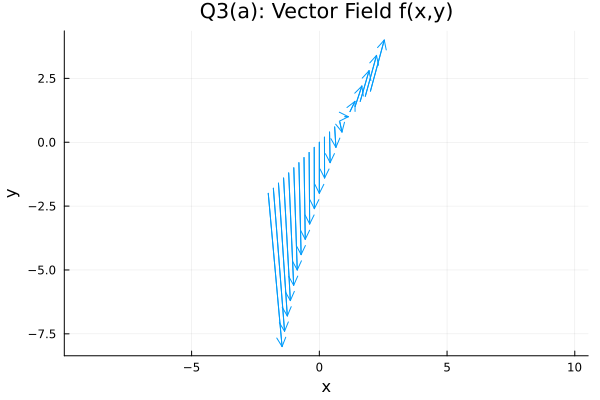

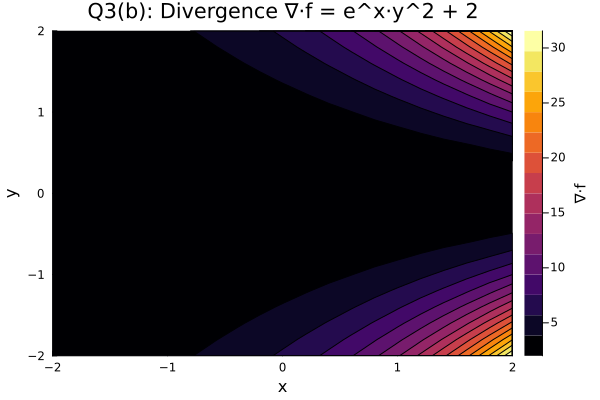

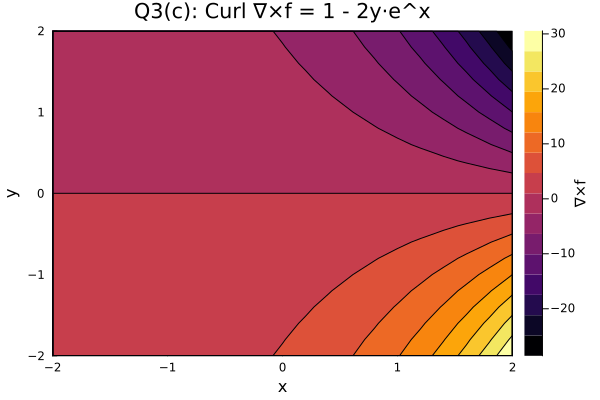

In [11]:
#Q3 

using Plots
gr()                       # set GR backend (works well for scripts)

# --- 1) Define field and analytic divergence & curl (no SymPy needed) ---
f1(x,y) = exp(x) * y^2    # first component f₁(x,y) = e^x * y^2
f2(x,y) = x + 2y          # second component f₂(x,y) = x + 2y

divf(x,y)  = exp(x) * y^2 + 2        # ∂f1/∂x + ∂f2/∂y
curlf(x,y) = 1 - 2*y*exp(x)          # ∂f2/∂x - ∂f1/∂y  (scalar k-component)

# --- 2) Build numeric grid ---
x_range = -2.0:0.2:2.0
y_range = -2.0:0.2:2.0

# U and V must be matrices with rows for y and columns for x:
U = [f1(x,y) for y in y_range, x in x_range]   # U[j,i] corresponds to (x[i], y[j])
V = [f2(x,y) for y in y_range, x in x_range]

# --- 3) Vector (quiver) plot ---
p_vec = quiver(
    x_range, y_range,
    quiver = (U, V),
    title = "Q3(a): Vector Field f(x,y)",
    xlabel = "x",
    ylabel = "y",
    aspect_ratio = :equal,
    legend = false
)
display(p_vec)

# --- 4) Divergence contour ---
div_data = [divf(x,y) for y in y_range, x in x_range]
p_div = contourf(
    x_range, y_range, div_data,
    title = "Q3(b): Divergence ∇·f = e^x·y^2 + 2",
    xlabel = "x",
    ylabel = "y",
    colorbar_title = "∇·f"
)
display(p_div)

# --- 5) Curl contour ---
curl_data = [curlf(x,y) for y in y_range, x in x_range]
p_curl = contourf(
    x_range, y_range, curl_data,
    title = "Q3(c): Curl ∇×f = 1 - 2y·e^x",
    xlabel = "x",
    ylabel = "y",
    colorbar_title = "∇×f"
)
display(p_curl)


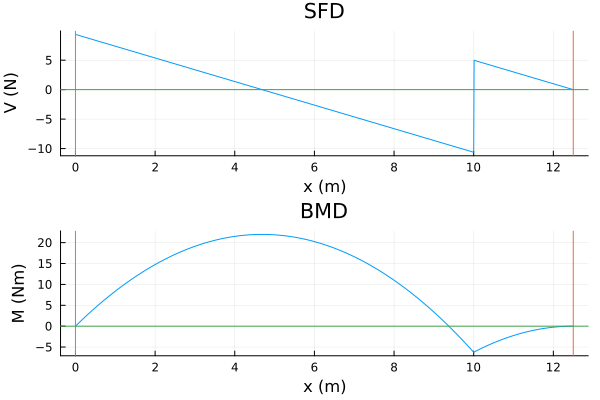

(0.0:0.01:12.5, [9.375, 9.355, 9.335, 9.315, 9.295, 9.275, 9.255, 9.235, 9.215, 9.195  …  0.17999999999999972, 0.16000000000000014, 0.14000000000000057, 0.120000000000001, 0.10000000000000142, 0.0799999999999983, 0.05999999999999872, 0.03999999999999915, 0.019999999999999574, 0.0], [0.0, 0.09365, 0.1871, 0.28035, 0.3734, 0.46625, 0.5589, 0.6513500000000001, 0.7436, 0.83565  …  -0.008100000000013097, -0.006399999999985084, -0.004899999999992133, -0.003599999999977399, -0.0024999999999693046, -0.001599999999996271, -0.0009000000000298769, -0.0004000000000132786, -0.00010000000000331966, 0.0])

In [13]:
# Q4

using Plots
gr()

q = 2.0
l = 10.0
L = 1.25 * l
Ay = 0.375 * q * L
By = 0.625 * q * L
x_B = l   # coordinate of support B

function SfdBmd(q, l, L, Ay, By, x_B)
    x = 0.0:0.01:L
    Sf = zeros(length(x))
    Bm = zeros(length(x))

    for (i, xi) in enumerate(x)
        if xi <= x_B
            Sf[i] = Ay - q*xi
            Bm[i] = Ay*xi - 0.5*q*xi^2
        else
            Sf[i] = Ay + By - q*xi
            Bm[i] = Ay*xi + By*(xi - x_B) - 0.5*q*xi^2
        end
    end

    p1 = plot(x, Sf, xlabel="x (m)", ylabel="V (N)", title="SFD", legend=false)
    vline!(p1, [0, L]); hline!(p1, [0])

    p2 = plot(x, Bm, xlabel="x (m)", ylabel="M (Nm)", title="BMD", legend=false)
    vline!(p2, [0, L]); hline!(p2, [0])

    plt = plot(p1, p2, layout=(2,1))
    display(plt)
    return x, Sf, Bm
end

x, Sf, Bm = SfdBmd(q, l, L, Ay, By, x_B)


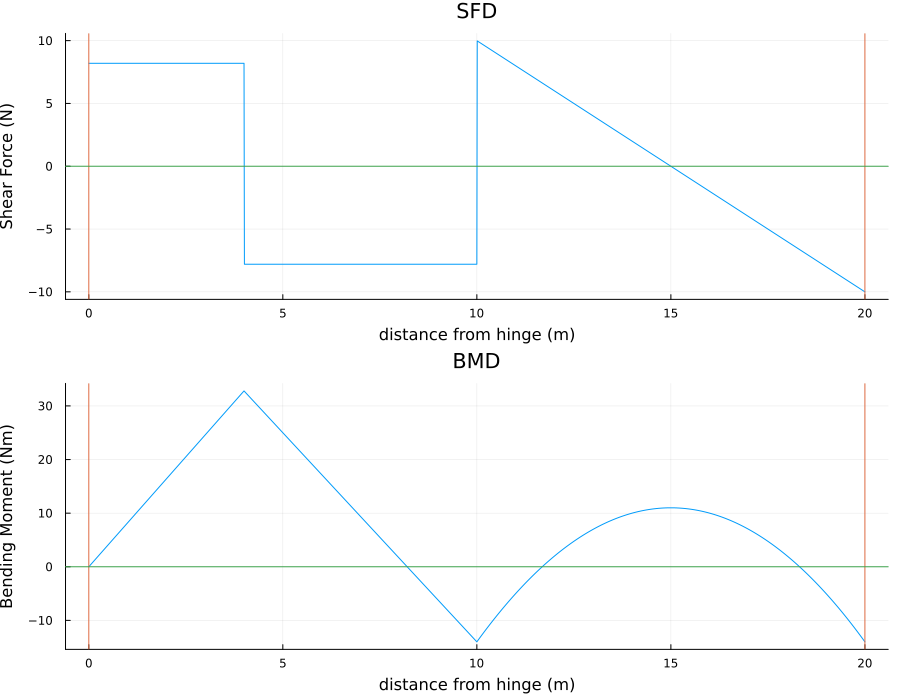

In [14]:
# Q5

using Plots
gr()                     # choose a backend that usually works (GR)

# Given data
q = 2.0
l = 10.0
L = 2*l
Ay = 0.41 * q * l
By = 0.89 * q * l

function SfdBmd(q, l, L, Ay, By)
    x = 0.0:0.01:L
    Sf = zeros(length(x))

    # Shear Force
    for (i, xi) in enumerate(x)
        if xi <= 0.4*l
            Sf[i] = Ay
        elseif xi > 0.4*l && xi <= l
            Sf[i] = Ay - 0.8*q*l
        else
            Sf[i] = Ay + By - 0.8*q*l - q*(xi - l)
        end
    end

    # Bending Moment
    Bm = zeros(length(x))
    for (i, xi) in enumerate(x)
        if xi <= 0.4*l
            Bm[i] = Ay * xi
        elseif xi > 0.4*l && xi <= l
            Bm[i] = Ay*xi - (0.8*q*l*(xi - 0.4*l))
        else
            Bm[i] = (Ay*xi) + (By*(xi - l)) -
                    (0.8*q*l*(xi - 0.4*l)) -
                    (q*(xi - l)^2)/2
        end
    end

    return x, Sf, Bm
end

x, Sf, Bm = SfdBmd(q, l, L, Ay, By)

# Make separate plots then combine (reliable display)
p1 = plot(x, Sf,
    xlabel = "distance from hinge (m)",
    ylabel = "Shear Force (N)",
    title = "SFD",
    legend = false)
vline!(p1, [0, L])        # vertical reference lines
hline!(p1, [0])           # zero axis

p2 = plot(x, Bm,
    xlabel = "distance from hinge (m)",
    ylabel = "Bending Moment (Nm)",
    title = "BMD",
    legend = false)
vline!(p2, [0, L])
hline!(p2, [0])
# Combine into one figure (2 rows) and show
plt = plot(p1, p2, layout = (2,1), size=(900,700))
display(plt)              # ensure it is shown in script/non-interactive contexts